In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv


In [3]:
df = pd.read_csv('/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv')

print("First 5 records:", df.head())

First 5 records:    customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
df.shape #no null values

(10000, 12)

In [6]:
df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [7]:
df.country.value_counts(normalize = True).mul(100)
#half of the data points is of framce people

country
France     50.14
Germany    25.09
Spain      24.77
Name: proportion, dtype: float64

In [8]:
df.gender.value_counts(normalize = True).mul(100)

gender
Male      54.57
Female    45.43
Name: proportion, dtype: float64

In [9]:
df.churn.value_counts(normalize = True).mul(100)

churn
0    79.63
1    20.37
Name: proportion, dtype: float64

In [10]:
df.dtypes
#country and gneder needs to be encoded

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [11]:
df = pd.get_dummies(data = df, columns = ['country', 'gender'], drop_first = True, dtype = int)
df.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [12]:
df = df.drop(['customer_id'], axis = 1)

In [13]:
df.duplicated().sum()

0

In [14]:
df.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [15]:
X = df.drop(['churn'], axis = 1)
y = df['churn']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
X_train_scaled

array([[ 0.39901078, -0.75002335, -0.69029234, ..., -0.57946723,
         1.74836928, -1.09748077],
       [ 0.28469407, -1.60984057, -0.3426037 , ..., -0.57946723,
        -0.57196155, -1.09748077],
       [ 1.27197474,  2.40263983, -1.03798099, ..., -0.57946723,
        -0.57196155,  0.9111777 ],
       ...,
       [-0.15178791, -0.6544881 ,  1.04815088, ..., -0.57946723,
         1.74836928, -1.09748077],
       [-1.30534743, -0.36788235,  0.70046224, ..., -0.57946723,
        -0.57196155,  0.9111777 ],
       [ 0.11841522, -0.6544881 ,  1.39583953, ..., -0.57946723,
        -0.57196155,  0.9111777 ]])

In [19]:
X_train.shape

(8000, 11)

In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2025-06-15 16:01:43.808421: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750003304.084216      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750003304.182883      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [35]:
model  = Sequential()
model.add(Dense(3, activation = 'sigmoid', input_dim = 11))
model.add(Dense(1, activation = 'sigmoid'))

In [36]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 3)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam')

In [39]:
model.fit(X_train_scaled, y_train, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6518
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5324
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4866
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4607
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4550
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4557
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4463
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4459
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4405
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4315
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4299
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4242
Epoch 13/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4272
Epoch 14/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4313
Epoch 15/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0

In [40]:
model.layers[0].get_weights() #layer 0 weights & biases

[array([[-0.08007947,  0.1462883 ,  0.03511979],
        [-0.38553098, -3.446443  , -2.6082957 ],
        [ 0.0716873 , -0.01371996,  0.2559605 ],
        [ 0.5447116 , -0.03274113, -0.12264021],
        [-0.17180632, -0.01506931, -0.01088206],
        [-0.06823868, -0.32938504,  0.19285788],
        [-2.3255367 , -1.073366  , -0.3302803 ],
        [ 0.31380913,  0.22289686, -0.00542074],
        [ 0.40423462,  0.12270842, -1.1834042 ],
        [ 0.07306215,  0.0231764 ,  0.13355473],
        [-0.7944099 , -0.03783126,  0.47195047]], dtype=float32),
 array([0.28125498, 0.46154776, 0.6053289 ], dtype=float32)]

In [41]:
model.layers[1].get_weights()

[array([[ 2.2350152],
        [-1.9905314],
        [-1.3156061]], dtype=float32),
 array([-0.9003357], dtype=float32)]

In [42]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [43]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [44]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8455

In [22]:
model2 = Sequential()
model2.add(Dense(3, activation = 'relu', input_dim = 11))
model2.add(Dense(1, activation = 'sigmoid'))

In [24]:
model2.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])


In [27]:
history = model2.fit(X_train_scaled, y_train, validation_split = 0.2, epochs = 120)

Epoch 1/120
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8514 - loss: 0.3742 - val_accuracy: 0.8531 - val_loss: 0.3633
Epoch 2/120
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8529 - loss: 0.3702 - val_accuracy: 0.8519 - val_loss: 0.3625
Epoch 3/120
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8582 - loss: 0.3553 - val_accuracy: 0.8519 - val_loss: 0.3622
Epoch 4/120
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8563 - loss: 0.3564 - val_accuracy: 0.8519 - val_loss: 0.3622
Epoch 5/120
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8481 - loss: 0.3646 - val_accuracy: 0.8525 - val_loss: 0.3620
Epoch 6/120
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8597 - loss: 0.3570 - val_accuracy: 0.8519 - val_loss: 0.3612
Epoch 7/120
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8565 - loss: 0.3536 - val_accuracy: 0.8506 - val_loss: 0.3612
Epoch 8/120
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8593 - loss: 0.3606 - val_accu

In [28]:
y_log2 = model2.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [29]:
y_pred2 = np.where(y_log2 > 0.5, 1, 0)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_pred2, y_test)

0.8545

In [33]:
history

In [35]:
import matplotlib.pyplot as plt

In [36]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 3)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122 (492.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 82 (332.00 B)

In [37]:
history.history

{'accuracy': [0.856249988079071,
  0.8567187786102295,
  0.856249988079071,
  0.8568750023841858,
  0.8559374809265137,
  0.8568750023841858,
  0.8568750023841858,
  0.8567187786102295,
  0.8564062714576721,
  0.85546875,
  0.8564062714576721,
  0.8567187786102295,
  0.856249988079071,
  0.8568750023841858,
  0.85546875,
  0.8551562428474426,
  0.8560937643051147,
  0.856249988079071,
  0.8560937643051147,
  0.8553125262260437,
  0.8560937643051147,
  0.8551562428474426,
  0.8570312261581421,
  0.8578125238418579,
  0.8567187786102295,
  0.8567187786102295,
  0.8556249737739563,
  0.8559374809265137,
  0.8581249713897705,
  0.8571875095367432,
  0.8568750023841858,
  0.8582812547683716,
  0.8568750023841858,
  0.8570312261581421,
  0.8571875095367432,
  0.8573437333106995,
  0.8570312261581421,
  0.8571875095367432,
  0.8565624952316284,
  0.8578125238418579,
  0.8568750023841858,
  0.8582812547683716,
  0.8559374809265137,
  0.8565624952316284,
  0.8570312261581421,
  0.85859376192092

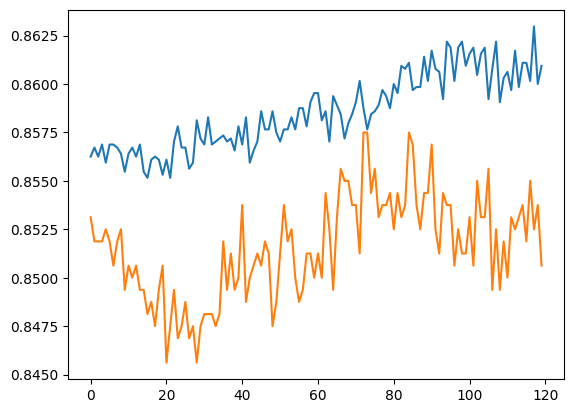

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

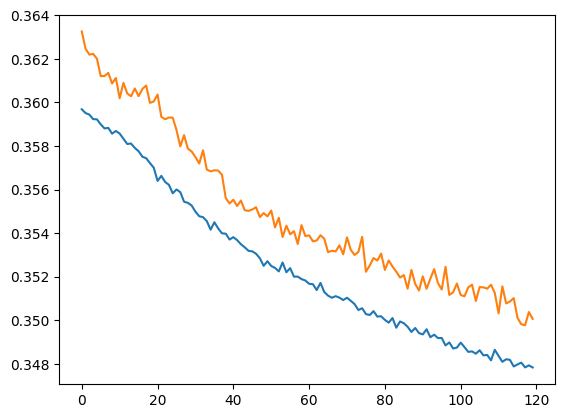

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])